# Chapter 4.  NumPy Basics: Arrays and Vectorized Computation

NumPy, short for Numerical Python, is one of the most important foundational packages for numerical computing in Python.   
Most computational packages providing scientific functionality use NumPy's array objects as the *lingua franca* for data exchange.   

Here are some of the things you’ll find in NumPy: 
* ndarray, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities. 
* Mathematical functions for fast operations on entire arrays of data without having to write loops. 
* Tools for reading/writing array data to disk and working with memory-mapped files. 
* Linear algebra, random number generation, and Fourier transform capabilities. 
* A C API for connecting NumPy with libraries written in C, C++, or FORTRAN. 

**Because NumPy provides an easy-to-use C API, it is straightforward to pass data to external libraries written in a low-level language and also for external libraries to return data to Python as NumPy arrays. This feature has made Python a language of choice for wrapping legacy C/C++/Fortran codebases and giving them a dynamic and easy-to-use interface.** 

For most data analysis applications, the main areas of functionality I'll focus on are: 
* Fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformation, and any other kinds of computations 
* Common array algorithms like sorting, unique, and set operations 
* Efficient descriptive statistics and aggregating/summarizing data 
* Data alignment and relational data manipulations for merging and joining together heterogeneous datasets 
* Expressing conditional logic as array expressions instead of loops with if-elifelse branches 
* Group-wise data manipulations (aggregation, transformation, function application) 

While NumPy provides a computational foundation for general numerical data processing, many readers will want to use pandas as the basis for most kinds of statistics
or analytics, especially on tabular data. pandas also provides some more domainspecific functionality like time series manipulation, which is not present in NumPy.

One of the reasons NumPy is so important for numerical computations in Python is
because it is designed for efficiency on large arrays of data. There are a number of
reasons for this:
- NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy’s library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.
- NumPy operations perform complex computations on entire arrays without the need for Python for loops.

In [1]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In this chapter and throughout the book, I use the standard
NumPy convention of always using import numpy as np.

To give you an idea of the performance difference, consider a NumPy array of one million integers, and the equivalent Python list:


In [2]:
#import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

Now let’s multiply each sequence by 2:

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 29.9 ms


In [4]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 1.23 s


In [5]:
%%time
for _ in range(10): 
        my_arr2 = my_arr * 2

Wall time: 43.9 ms


<span style="color:red">NumPy-based algorithms are generally **10 to 100 times faster (or more)** than their pure Python counterparts and use significantly less memory.

## 4.1  The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray,
which is a fast, flexible container for large datasets in Python. Arrays enable you to
perform mathematical operations on whole blocks of data using similar syntax to the
equivalent operations between scalar elements.


To give you a flavor of how NumPy enables batch computations with similar syntax
to scalar values on built-in Python objects, I first import NumPy and generate a small
array of random data:


In [6]:
import numpy as np
# Generate some standard normal random data
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [7]:
?np.random.randn

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the ``standard_normal`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is return

In [8]:
data * 10

array([[-2.0471,  4.7894, -5.1944],
       [-5.5573, 19.6578, 13.9341]])

In [9]:
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

### <span style="color:red">An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type. </span>  
Every array has a **shape**, a tuple indicating the size of each dimension, and a **dtype**, an object describing the *data type* of the array

In [10]:
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

Whenever you see “array,” “NumPy array,” or “ndarray” in the text,
with few exceptions they all refer to the same thing: the ndarray
object.

### Creating ndarrays

The easiest way to create an array is to use the **array** function. This accepts any
sequence-like object (including other arrays) and produces a new NumPy array containing the passed data. For example, a list is a good candidate for conversion:


In [12]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [13]:
print(arr1)

[6.  7.5 8.  0.  1. ]


In [14]:
print(type(arr1))

<class 'numpy.ndarray'>


In [15]:
data11 = (6, 7.5, 8, 0, 1)
arr11 = np.array(data1)
arr11

array([6. , 7.5, 8. , 0. , 1. ])

In [16]:
data11 = {6, 7.5, 8, 0, 1}
arr11 = np.array(data1)
arr11

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array.

In [17]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)
arr2

[[1 2 3 4]
 [5 6 7 8]]


array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array **arr2** has two dimensions with shape
inferred from the data. We can confirm this by inspecting the **ndim** and **shape**
attributes:

In [18]:
arr2.ndim

2

In [19]:
arr2.shape

(2, 4)

Unless explicitly specified (more on this later), **np.array** tries to infer a good data
type for the array that it creates. The data type is stored in a special **dtype** metadata
object; for example, in the previous two examples we have:

In [20]:
arr1.dtype

dtype('float64')

In [21]:
arr2.dtype

dtype('int32')

In addition to **np.array**, there are a number of other functions for creating new
arrays. As examples, **zeros** and **ones** create arrays of 0s or 1s, respectively, with a
given length or shape. **empty** creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple
for the shape:

In [22]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

To create a higher dimensional array with these methods, pass a tuple for the shape.

In [23]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

**empty** creates an array without initializing its values to any particular value.  

In [24]:
np.empty((2, 3, 2))

array([[[1.3630e-311, 2.8656e-322],
        [0.0000e+000, 0.0000e+000],
        [0.0000e+000, 8.7598e+164]],

       [[7.4804e-091, 3.5401e-061],
        [1.5247e-052, 8.7801e-071],
        [6.4822e+170, 5.8247e+257]]])

<img style="float: left;" src="pic/pic_0_1.png">

<span style="color:red">It's not safe to assume that np.empty will return an array of all zeros.   
In some cases, it may return uninitialized “garbage” values.


**arange** is an array-valued version of the built-in Python range function.

In [25]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

<img style="float: left;" src="pic/pic_4_1.png" width="700">

### Data Types for ndarrays

The *data type* or **dtype** is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data.

In [26]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [27]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [28]:
arr1.dtype

dtype('float64')

In [29]:
arr2.dtype

dtype('int32')

The numerical dtypes are named the same way: a type name, like float or int, followed by a number indicating the number of bits per element. A standard doubleprecision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as float64. See Table 4-2 for a full listing of NumPy’s supported data types.

<img style="float: left;" src="pic/pic_0_2.png">

Don’t worry about memorizing the NumPy dtypes, especially if you’re a new user.   
It’s often only necessary to care about the general kind of data you’re dealing with, whether floating point, complex, integer, boolean, string, or general Python object.   
When you need more control over how data are stored in memory and on disk, especially large datasets, it is good to know that you have control over the storage type.

<img style="float: left;" src="pic/pic_4_2.png" width="700">

You can explicitly convert or *cast* an array from one dtype to another using ndarray’s **astype** method.

In [30]:
arr = np.array([1, 2, 3, 4, 5])

In [31]:
arr.dtype

dtype('int32')

In [32]:
float_arr = arr.astype(np.float64)

In [33]:
float_arr

array([1., 2., 3., 4., 5.])

In [34]:
print(float_arr)

[1. 2. 3. 4. 5.]


In [35]:
float_arr.dtype

dtype('float64')

If I cast some floating-point numbers to be of integer dtype, the decimal part will be truncated.

In [36]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [37]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

If you have an array of strings representing numbers, you can use astype to convert them to numeric form.

In [38]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [39]:
numeric_strings.dtype

dtype('S4')

In [40]:
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

Bytes literals are always prefixed with 'b' or 'B'; they produce an instance of the bytes type instead of the str type.

In [41]:
x=np.array(['3','4'],dtype=np.string_)
print(x.dtype)
x

|S1


array([b'3', b'4'], dtype='|S1')

In [42]:
y=np.array(['3','4'])
print(y.dtype)
y

<U1


array(['3', '4'], dtype='<U1')

In [43]:
x.astype(np.int32)

array([3, 4])

In [44]:
y.astype(np.int32)

array([3, 4])

<img style="float: left;" src="pic/pic_0_1.png">

<span style="color:red">It’s important to be cautious when using the numpy.string_ type, as string data in NumPy is fixed size and may truncate input without warning. 

<img style="float: left;" src="pic/pic_0_2.png">

Calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype.


### Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data without writing any for loops. NumPy users call this <span style="color:red"> **vectorization** <span style="color:black">. Any arithmetic operations between equal-size arrays applies the operation element-wise:


In [82]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [83]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [84]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [85]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [86]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

The number of digits of precision for floating point is 4. Why?   --- > Take a look at first cell.

In [87]:
np.set_printoptions(precision=4, suppress=True)

In [88]:
1 / (arr * 100000)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [89]:
arr * 100000000000

array([[1.e+11, 2.e+11, 3.e+11],
       [4.e+11, 5.e+11, 6.e+11]])

In [90]:
x=np.array([0.00001, 50000])

In [91]:
x

array([    0., 50000.])

In [92]:
1 / x

array([100000.,      0.])

In [93]:
np.set_printoptions(precision=5, suppress=False)

In [94]:
np.set_printoptions?

Signature:
np.set_printoptions(
    precision=None,
    threshold=None,
    edgeitems=None,
    linewidth=None,
    suppress=None,
    nanstr=None,
    infstr=None,
    formatter=None,
    sign=None,
    floatmode=None,
    **kwarg,
)
Docstring:
Set printing options.

These options determine the way floating point numbers, arrays and
other NumPy objects are displayed.

Parameters
----------
precision : int or None, optional
    Number of digits of precision for floating point output (default 8).
    May be None if `floatmode` is not `fixed`, to print as many digits as
    necessary to uniquely specify the value.
threshold : int, optional
    Total number of array elements which trigger summarization
    rather than full repr (default 1000).
    To always use the full repr without summarization, pass `sys.maxsize`.
edgeitems : int, optional
    Number of array items in summary at beginning and end of
    each dimension (default 3).
linewidth : int, optional
    The number of characters 

suppress : bool, optional

If True, always print floating point numbers using fixed point notation, in which case numbers equal to zero in the current precision will print as zero. If False, then scientific notation is used when absolute value of the smallest number is < 1e-4 or the ratio of the maximum absolute value to the minimum is > 1e3. The default is False.

In [95]:
1 / (arr * 100000)

array([[1.00000e-05, 5.00000e-06, 3.33333e-06],
       [2.50000e-06, 2.00000e-06, 1.66667e-06]])

In [96]:
arr * 100000000000

array([[1.e+11, 2.e+11, 3.e+11],
       [4.e+11, 5.e+11, 6.e+11]])

In [97]:
x=np.array([0.00001, 50000])

In [98]:
x

array([1.e-05, 5.e+04])

In [99]:
1 / x

array([1.e+05, 2.e-05])

In [100]:
np.set_printoptions(precision=4, suppress=True)

In [101]:
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

Comparisons between arrays of the same size yield boolean arrays.

In [102]:
arr1 =  np.array([1., 2., 3.])

In [103]:
arr2 = np.array([0., 4., 1.])

In [104]:
arr2 > arr1

array([False,  True, False])

Comparisons between arrays of the same size yield boolean arrays:


In [68]:
arr3 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [105]:
arr3

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [70]:
arr3 > arr

array([[False,  True, False],
       [ True, False,  True]])

Operations between differently sized arrays is called <span style="color:red"> **broadcasting** <span style="color:black"> and will be discussed in more detail in Appendix A. 

### Basic Indexing and Slicing

NumPy array indexing is a rich topic, as there are many ways you may want to select
a subset of your data or individual elements. One-dimensional arrays are simple; on
the surface they act similarly to Python lists:

In [71]:
arr = np.arange(10)

In [72]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
arr[5]

5

In [74]:
arr[5:8]

array([5, 6, 7])

In [75]:
arr[5:8] = 12

In [76]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

##### python list

In [77]:
x=list(range(10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [78]:
x[5:8]=12

TypeError: can only assign an iterable

In [106]:
x[5:8]=[12,12,12]
x

ValueError: cannot copy sequence with size 3 to array axis with dimension 0

In numpy, as you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is propagated (or *broadcasted* henceforth) to the entire selection. <br><br>

<br><br><br>

An important first distinction from Python’s built-in lists is that array slices are *views* on the original array.   
This means that the data is not copied, and any modifications to the view will be reflected in the source array. 

In [114]:
arr = np.arange(10)


In [115]:
arr_slice = arr[5:8]

In [116]:
arr_slice

array([5, 6, 7])

In [117]:
arr_slice[1] = 12345

In [118]:
arr

array([    0,     1,     2,     3,     4,     5, 12345,     7,     8,
           9])

In [119]:
arr_slice[:] = 64

In [120]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

<img style="float: left;" src="pic/pic_0_1.png">

<span style="color:red">If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, arr[5:8].copy().
 

With higher dimensional arrays, you have many more options.  
In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:


In [121]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [122]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [123]:
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively. But that is a bit too much
work, so you can pass a comma-separated list of indices to select individual elements.
So these are equivalent:


In [ ]:
arr2d[0][2]

In [ ]:
arr2d[0, 2]

See Figure 4-1 for an illustration of indexing on a two-dimensional array. I find it
helpful to think of axis 0 as the “rows” of the array and axis 1 as the “columns.”


<img style="float: left;" src="pic/pic_4_3.png" width="700">

In multidimensional arrays, if you omit later indices, the returned object will be a
lower dimensional ndarray consisting of all the data along the higher dimensions. So
in the 2 × 2 × 3 array arr3d:

In [124]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] is a 2 × 3 array:

In [125]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to arr3d[0]:

In [126]:
old_values = arr3d[0].copy()

In [127]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [128]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0),
forming a 1-dimensional array:

In [135]:
arr3d[1, 0]

array([7, 8, 9])

This expression is the same as though we had indexed in two steps:

In [130]:
x = arr3d[1]

In [131]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [132]:
x[0]

array([7, 8, 9])

#### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced with the
familiar syntax:

In [133]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [ ]:
arr[1:6]

Consider the two-dimensional array from before, arr2d. Slicing this array is a bit
different:


In [137]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [138]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a
range of elements along an axis. It can be helpful to read the expression arr2d[:2] as
“select the first two rows of arr2d.”

You can pass multiple slices just like you can pass multiple indexes:

In [139]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions. By mixing integer indexes and slices, you get lower dimensional slices.

For example, I can select the second row but only the first two columns like so:


In [141]:
arr2d[1, :2]

array([4, 5])

Similarly, I can select the third column but only the first two rows like so:

In [142]:
arr2d[:2, 2]

array([3, 6])

See Figure 4-2 for an illustration. Note that a colon by itself means to take the entire
axis, so you can slice only higher dimensional axes by doing:


In [ ]:
arr2d[:, :1]

Of course, assigning to a slice expression assigns to the whole selection:

In [ ]:
arr2d[:2, 1:] = 0
arr2d

<img style="float: left;" src="pic/pic_4_4.png" width="700">

In [143]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [144]:
arr2d[2]

array([7, 8, 9])

In [145]:
arr2d[1:]

array([[4, 5, 6],
       [7, 8, 9]])

In [146]:
arr2d[2,:]

array([7, 8, 9])

In [147]:
arr2d[2,2]

9

In [ ]:
arr2d[2:,:]

<pre>
expression의 법칙  
original: 2 dim array  - - - > 최소 1 dim, 생략은 slice 1로 가정
    
slicing expression     resulting shape dim
no index   no slice         2 dim
1  index   no slice         1 dim
no index    1 slice         2 dim
1  index    1 slice         1 dim
2  index   no slice         not array
no index    2 slice         2 dim

### Boolean Indexing

Let’s consider an example where we have some data in an array and an array of names
with duplicates. I’m going to use here the randn function in numpy.random to generate
some random normally distributed data:

In [148]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [149]:
data = np.random.randn(7, 4)

In [150]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [151]:
data

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

Suppose each name corresponds to a row in the data array and we wanted to select all the rows with corresponding name 'Bob'.  
Like arithmetic operations, comparisons (such as ==) with arrays are also **vectorized**.   
Thus, comparing names with the string 'Bob' yields a boolean array

In [ ]:
names == 'Bob'

This boolean array can be passed when indexing the array:

In [ ]:
data[names == 'Bob']

The boolean array must be of the same length as the array axis it’s indexing. You can
even mix and match boolean arrays with slices or integers (or sequences of integers;
more on this later).

<img style="float: left;" src="pic/pic_0_1.png">

<span style="color:red">Boolean selection will not fail if the boolean array is not the correct length, so I recommend care when using this feature.

In these examples, I select from the rows where names == 'Bob' and index the col‐
umns, too:


In [152]:
data[names == 'Bob', 2:]

array([[ 0.769 ,  1.2464],
       [-0.5397,  0.477 ]])

In [153]:
data[names == 'Bob', 3]

array([1.2464, 0.477 ])

To select everything but 'Bob', you can either use != or negate the condition using ~:


In [154]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [155]:
data[~(names == 'Bob')]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

The ~ operator can be useful when you want to invert a general condition.

In [156]:
cond = names == 'Bob'
data[~cond]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

Selecting two of the three names to combine multiple boolean conditions, use
boolean arithmetic operators like & (and) and | (or):

In [157]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [158]:
data[mask]

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241]])

Selecting data from an array by boolean indexing *always* creates a copy of the data,
even if the returned array is unchanged.


<img style="float: left;" src="pic/pic_0_1.png">

<span style="color:red">The Python keywords and and or do not work with boolean arrays. Use & (and) and | (or) instead.


다음 코드는 에러

In [161]:
mask = (names == 'Bob') and (names == 'Will')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Setting values with boolean arrays works in a common-sense way. To set all of the
negative values in data to 0 we need only do:

In [162]:
data[data < 0] = 0
data

array([[0.0929, 0.2817, 0.769 , 1.2464],
       [1.0072, 0.    , 0.275 , 0.2289],
       [1.3529, 0.8864, 0.    , 0.    ],
       [1.669 , 0.    , 0.    , 0.477 ],
       [3.2489, 0.    , 0.    , 0.1241],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

In [163]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

Setting whole rows or columns using a one-dimensional boolean array is also easy:

In [164]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.0072, 0.    , 0.275 , 0.2289],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

### Fancy Indexing

*Fancy indexing* is a term adopted by NumPy to describe indexing using integer arrays.

In [165]:
arr = np.empty((8, 4))

In [166]:
for i in range(8):
    arr[i] = i

In [167]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order.

In [ ]:
arr[[4, 3, 0, 6]]

Hopefully this code did what you expected! Using negative indices selects rows from
the end:

In [ ]:
arr[[-3, -5, -7]]

In [ ]:
arr = np.arange(32).reshape((8, 4))

In [ ]:
arr

Passing multiple index arrays does something slightly different; it selects a onedimensional array of elements corresponding to each tuple of indices.

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. Regardless of how many dimensions the array has (here, only 2), the result of fancy indexing is always one-dimensional. 

### Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything.   
Arrays have the **transpose** method and also the special T attribute.

In [ ]:
arr = np.arange(15).reshape((3, 5))

In [ ]:
arr

In [ ]:
arr.T

When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using **np.dot**.

In [ ]:
arr = np.random.randn(6, 3)

In [ ]:
arr

In [ ]:
np.dot(arr.T, arr)

## Universal Functions: Fast Element-Wise Array Functions

In [ ]:
L=[1,2,3,4]

In [ ]:
import math
math.sqrt(L)

A universal function, or *ufunc*, is a function that performs element-wise operations on data in ndarrays.  
You can think of them as fast *vectorized wrappers* for simple functions that take one or more scalar values and produce one or more  scalar results.   

Many ufuncs are simple element-wise transformations, like **sqrt** or **exp**:

In [ ]:
arr = np.arange(10)

In [ ]:
arr

In [ ]:
np.sqrt(arr)

In [ ]:
np.exp(arr)

These are referred to as *unary* ufuncs.   
Others, such as **add** or **maximum**, take two arrays (thus, binary ufuncs) and return a single array as the result.


In [ ]:
x = np.random.randn(8)

In [ ]:
y = np.random.randn(8)

In [ ]:
x

In [ ]:
y

In [ ]:
np.maximum(x, y)

Here, numpy.maximum computed the element-wise maximum of the elements in x and y. 

<img style="float: left;" src="pic/pic_4_5.png" width="700">

<img style="float: left;" src="pic/pic_4_6.png" width="700">

<img style="float: left;" src="pic/pic_4_7.png" width="700">

## 4.3 Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as <span style="color:blue">**concise array expressions**<span style="color:black"> that might otherwise require writing loops.     
This practice of replacing explicit loops with array expressions is commonly referred to as <span style="color:red">**vectorization**<span style="color:black">.   
In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations. 

As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values.   
The **np.meshgrid** function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [168]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [169]:
points

array([-5.  , -4.99, -4.98, -4.97, -4.96, -4.95, -4.94, -4.93, -4.92,
       -4.91, -4.9 , -4.89, -4.88, -4.87, -4.86, -4.85, -4.84, -4.83,
       -4.82, -4.81, -4.8 , -4.79, -4.78, -4.77, -4.76, -4.75, -4.74,
       -4.73, -4.72, -4.71, -4.7 , -4.69, -4.68, -4.67, -4.66, -4.65,
       -4.64, -4.63, -4.62, -4.61, -4.6 , -4.59, -4.58, -4.57, -4.56,
       -4.55, -4.54, -4.53, -4.52, -4.51, -4.5 , -4.49, -4.48, -4.47,
       -4.46, -4.45, -4.44, -4.43, -4.42, -4.41, -4.4 , -4.39, -4.38,
       -4.37, -4.36, -4.35, -4.34, -4.33, -4.32, -4.31, -4.3 , -4.29,
       -4.28, -4.27, -4.26, -4.25, -4.24, -4.23, -4.22, -4.21, -4.2 ,
       -4.19, -4.18, -4.17, -4.16, -4.15, -4.14, -4.13, -4.12, -4.11,
       -4.1 , -4.09, -4.08, -4.07, -4.06, -4.05, -4.04, -4.03, -4.02,
       -4.01, -4.  , -3.99, -3.98, -3.97, -3.96, -3.95, -3.94, -3.93,
       -3.92, -3.91, -3.9 , -3.89, -3.88, -3.87, -3.86, -3.85, -3.84,
       -3.83, -3.82, -3.81, -3.8 , -3.79, -3.78, -3.77, -3.76, -3.75,
       -3.74, -3.73,

In [170]:
xs, ys = np.meshgrid(points, points)

In [171]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [172]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [173]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

As a preview of Chapter 9, I use matplotlib to create visualizations of this twodimensional array:


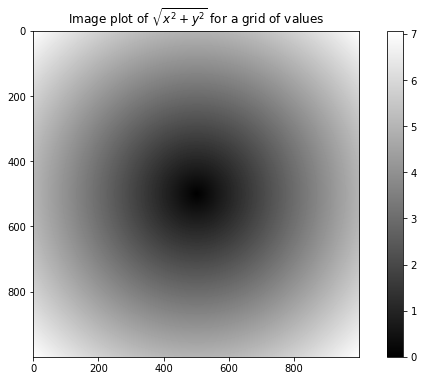

In [174]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

plt.draw()

In [175]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

The **numpy.where** function is a *vectorized version* of the ternary expression **x if condition else y**. 

In [176]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr.  
A list comprehension doing this might look like:

In [177]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems.   
First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code).   
Second, it will not work with multidimensional arrays. 

In [178]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to **np.where** don’t need to be arrays; one or both of them can be scalars.   
A typical use of where in data analysis is to produce a new array of values based on another array.   
Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2.   
This is very easy to do with np.where:

In [179]:
arr = np.random.randn(4, 4)

In [180]:
arr

array([[-0.8608,  0.5601, -1.2659,  0.1198],
       [-1.0635,  0.3329, -2.3594, -0.1995],
       [-1.542 , -0.9707, -1.307 ,  0.2863],
       [ 0.378 , -0.7539,  0.3313,  1.3497]])

In [181]:
arr > 0

array([[False,  True, False,  True],
       [False,  True, False, False],
       [False, False, False,  True],
       [ True, False,  True,  True]])

In [182]:
np.where(arr > 0, 2, -2)

array([[-2,  2, -2,  2],
       [-2,  2, -2, -2],
       [-2, -2, -2,  2],
       [ 2, -2,  2,  2]])

You can combine scalars and arrays when using np.where. For example, I can replace
all positive values in arr with the constant 2 like so:


In [183]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.8608,  2.    , -1.2659,  2.    ],
       [-1.0635,  2.    , -2.3594, -0.1995],
       [-1.542 , -0.9707, -1.307 ,  2.    ],
       [ 2.    , -0.7539,  2.    ,  2.    ]])

### Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class.   
You can use aggregations (often called *reductions*) like **sum**, **mean**, and **std** (standard deviation) either by calling the array instance method or using the top-level NumPy function.   

Here I generate some normally distributed random data and compute some aggregate statistics:


In [184]:
arr = np.random.randn(5, 4)

In [185]:
arr

array([[ 0.0699,  0.2467, -0.0119,  1.0048],
       [ 1.3272, -0.9193, -1.5491,  0.0222],
       [ 0.7584, -0.6605,  0.8626, -0.01  ],
       [ 0.05  ,  0.6702,  0.853 , -0.9559],
       [-0.0235, -2.3042, -0.6525, -1.2183]])

In [186]:
arr.mean()

-0.12201389423276714

In [187]:
np.mean(arr)

-0.12201389423276714

In [188]:
arr.sum()

-2.440277884655343

In [189]:
np.sum(arr)

-2.440277884655343

Functions like **mean** and **sum** take an optional axis argument that computes the statistic over the given axis, resulting in an array with one fewer dimension.

m x n arrray 에서, mean(0) (sum,max,min 동일)의 결과는 크기 n의 array 이고, mean(1) 의 결과는 크기 m의 array 이다. 

In [190]:
arr.sum(axis=0)

array([ 2.182 , -2.9671, -0.4979, -1.1572])

In [191]:
arr.mean(axis=1)

array([ 0.3274, -0.2797,  0.2376,  0.1543, -1.0496])

In [192]:
arr.mean(1)

array([ 0.3274, -0.2797,  0.2376,  0.1543, -1.0496])

Here, **arr.mean(1)** means “compute mean across the columns” where **arr.sum(0)** means “compute sum down the rows.”   

Other methods like **cumsum** and **cumprod** do not aggregate, instead producing an array of the intermediate results:

In [193]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In multidimensional arrays, accumulation functions like cumsum return an array of
the same size, but with the partial aggregates computed along the indicated axis
according to each lower dimensional slice:


In [194]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [195]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [196]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [197]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

<img style="float: left;" src="pic/pic_4_8.png" width="700">

### Methods for Boolean Arrays

Boolean values are coerced to 1 (**True**) and 0 (**False**) in the preceding methods.   
Thus, **sum** is often used as a means of counting **True** values in a boolean array.

In [198]:
arr = np.random.randn(100)

In [199]:
arr

array([-1.3326,  1.0746,  0.7236,  0.69  ,  1.0015, -0.5031, -0.6223,
       -0.9212, -0.7262,  0.2229,  0.0513, -1.1577,  0.8167,  0.4336,
        1.0107,  1.8249, -0.9975,  0.8506, -0.1316,  0.9124,  0.1882,
        2.1695, -0.1149,  2.0037,  0.0296,  0.7953,  0.1181, -0.7485,
        0.585 ,  0.1527, -1.5657, -0.5625, -0.0327, -0.929 , -0.4826,
       -0.0363,  1.0954,  0.9809, -0.5895,  1.5817, -0.5287,  0.457 ,
        0.93  , -1.5693, -1.0225, -0.4028,  0.2205, -0.1934,  0.6692,
       -1.649 , -2.2528, -1.1668,  0.3536,  0.7021, -0.2746, -0.1391,
        0.1077, -0.6065, -0.4171, -0.017 , -1.2241, -1.8008,  1.6347,
        0.989 ,  0.4579,  0.5552,  1.3067, -0.4406, -0.3014,  0.4988,
       -0.824 ,  1.3206,  0.508 , -0.6534,  0.187 , -0.3917, -0.2723,
       -0.0171,  0.6803,  0.6355, -0.7572,  0.7181, -0.3043, -1.6778,
        0.427 , -1.5637, -0.3675,  1.0459,  1.22  , -0.2477, -0.4162,
       -0.1167, -1.8448,  2.0687, -0.777 ,  1.4402, -0.1106,  1.2274,
        1.9208,  0.7

In [200]:
arr>0

array([False,  True,  True,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True, False, False, False,  True,  True, False,
        True, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True])

In [201]:
(arr > 0).sum() # Number of positive values

50

There are two additional methods, **any** and **all**, useful especially for boolean arrays. any tests whether one or more values in an array is True, while all checks if every value is True.


In [202]:
bools = np.array([False, False, True, False])

In [203]:
bools.any()

True

In [204]:
bools.all()

False

### Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place with the **sort**
method:

In [205]:
arr = np.random.randn(6)

In [206]:
arr

array([ 2.2247, -0.6794,  0.7274, -0.8687, -1.2139, -0.4706])

In [207]:
arr.sort()

In [208]:
arr

array([-1.2139, -0.8687, -0.6794, -0.4706,  0.7274,  2.2247])

You can sort each one-dimensional section of values in a multidimensional array inplace along an axis by passing the axis number to sort.

In [209]:
arr = np.random.randn(5, 3)

In [210]:
arr

array([[-0.9192, -0.8388,  0.4352],
       [-0.5578, -0.5675, -0.3726],
       [-0.9266,  1.7551,  1.2098],
       [ 1.27  , -0.9744, -0.6347],
       [-0.3957, -0.2894, -0.7343]])

In [211]:
arr.sort(1)

In [212]:
arr

array([[-0.9192, -0.8388,  0.4352],
       [-0.5675, -0.5578, -0.3726],
       [-0.9266,  1.2098,  1.7551],
       [-0.9744, -0.6347,  1.27  ],
       [-0.7343, -0.3957, -0.2894]])

The top-level method **np.sort** returns a sorted copy of an array instead of modifying the array in-place. A quick-and-dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank

In [213]:
arr = np.random.randn(5)
arr

array([-0.7285,  0.8388,  0.2669,  0.7212,  0.911 ])

In [214]:
new=np.sort(arr)
new

array([-0.7285,  0.2669,  0.7212,  0.8388,  0.911 ])

In [215]:
arr

array([-0.7285,  0.8388,  0.2669,  0.7212,  0.911 ])

In [216]:
arr.sort()

In [217]:
arr

array([-0.7285,  0.2669,  0.7212,  0.8388,  0.911 ])

### Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays.   
A commonly used one is **np.unique**, which returns the sorted unique values in an array.


In [218]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [219]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [220]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [221]:
np.unique(ints)

array([1, 2, 3, 4])

<img style="float: left;" src="pic/pic_4_9.png" width="700">

In [222]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 4.4  File Input and Output with Arrays

생략  - 대부분 pandas의 Input, Output 기능 사용

## 4.5  Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other square matrix math, is an important part of any array library.   
Multiplying two two-dimensional arrays with * is an element-wise product instead of a matrix dot product.   
Thus, there is a function **dot**, both an array method and a function in the numpy namespace, for matrix multiplication:


In [223]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [224]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [225]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [226]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y) is equivalent to np.dot(x, y):

In [227]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

## check broadcasting

In [228]:
w=np.ones(3)

In [232]:
w

array([1., 1., 1.])

In [236]:
w.shape

(3,)

In [233]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [237]:
x.shape

(2, 3)

In [234]:
x.dot(x)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [229]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [230]:
np.dot(x,w)

array([ 6., 15.])

In [231]:
x.dot(w)

array([ 6., 15.])

In [238]:
x.dot(w).shape

(2,)

The **@** symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication

In [239]:
x @ np.ones(3)

array([ 6., 15.])

**numpy.linalg** has a standard set of matrix decompositions and things like inverse and determinant.   
These are implemented under the hood via the same industrystandard linear algebra libraries used in other languages like MATLAB and R, such as BLAS, LAPACK, or possibly (depending on your NumPy build) the proprietary Intel MKL (Math Kernel Library):


In [240]:
from numpy.linalg import inv, qr

In [241]:
X = np.random.randn(5, 5)

In [242]:
X

array([[-1.0209, -1.4134,  1.2966,  0.2523,  1.1275],
       [-0.5684,  0.3094, -0.5774, -1.1686, -0.825 ],
       [-2.6444, -0.153 , -0.7519, -0.1326,  1.4573],
       [ 0.6095, -0.4938,  1.24  , -0.1357,  1.43  ],
       [-0.8469,  0.6033,  1.2636, -0.2555, -0.4457]])

In [243]:
X.T

array([[-1.0209, -0.5684, -2.6444,  0.6095, -0.8469],
       [-1.4134,  0.3094, -0.153 , -0.4938,  0.6033],
       [ 1.2966, -0.5774, -0.7519,  1.24  ,  1.2636],
       [ 0.2523, -1.1686, -0.1326, -0.1357, -0.2555],
       [ 1.1275, -0.825 ,  1.4573,  1.43  , -0.4457]])

In [244]:
mat = X.T.dot(X)

In [245]:
mat

array([[ 9.4468,  0.8598,  0.6786,  0.891 , -3.2868],
       [ 0.8598,  2.7246, -1.7462, -0.7849, -3.0468],
       [ 0.6786, -1.7462,  5.7141,  0.6104,  2.0525],
       [ 0.891 , -0.7849,  0.6104,  1.5306,  0.9751],
       [-3.2868, -3.0468,  2.0525,  0.9751,  6.3193]])

In [246]:
inv(mat)

array([[ 0.1706,  0.0322, -0.0451, -0.1559,  0.143 ],
       [ 0.0322,  0.9248,  0.1186,  0.1531,  0.4005],
       [-0.0451,  0.1186,  0.2301,  0.0238, -0.0447],
       [-0.1559,  0.1531,  0.0238,  0.9123, -0.1558],
       [ 0.143 ,  0.4005, -0.0447, -0.1558,  0.4643]])

In [247]:
mat.dot(inv(mat))

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0., -0.,  1.,  0., -0.],
       [ 0., -0.,  0.,  1., -0.],
       [ 0.,  0., -0., -0.,  1.]])

In [248]:
q, r = qr(mat)

In [249]:
r

array([[-10.1015,  -1.8408,  -0.2558,  -0.6252,   5.1654],
       [  0.    ,  -4.2098,   5.073 ,   1.8437,   5.9912],
       [  0.    ,   0.    ,  -3.866 ,   0.2881,   0.1778],
       [  0.    ,   0.    ,   0.    ,  -1.0969,  -0.458 ],
       [  0.    ,   0.    ,   0.    ,   0.    ,   1.5381]])

<img style="float: left;" src="pic/pic_4_10.png" width="700">

<img style="float: left;" src="pic/pic_4_11.png" width="700">

## 4.6 Pseudorandom Number Generation

The **numpy.random** module supplements the built-in Python **random** with functions
for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 × 4 array of samples from the standard
normal distribution using **normal**:

In [ ]:
samples = np.random.normal(size=(4, 4))
samples

Python’s built-in **random** module, by contrast, only samples one value at a time. As
you can see from this benchmark, **numpy.random** is well over an order of magnitude
faster for generating very large samples:


In [ ]:
from random import normalvariate
N = 1000000

In [ ]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

In [ ]:
%timeit np.random.normal(size=N)

We say that these are pseudorandom numbers because they are generated by an algo‐
rithm with deterministic behavior based on the *seed* of the random number generator. You can change NumPy’s random number generation seed using
**np.random.seed**:


<img style="float: left;" src="pic/pic_4_12.png" width="700">

## 4.7  Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability. 

Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in **random** module:


In [250]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

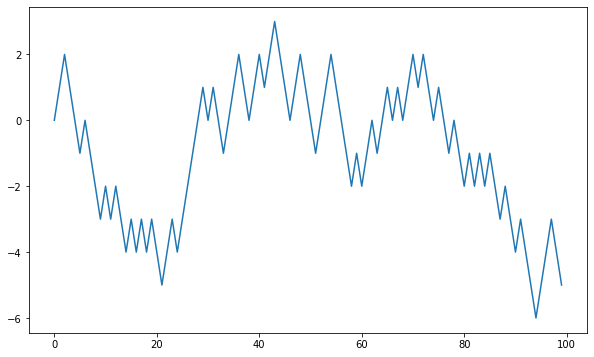

In [251]:
plt.figure()

plt.plot(walk[:100])

You might make the observation that walk is simply the cumulative sum of the random steps and could be evaluated as an array expression.   
Thus, I use the **np.random** module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum.


In [252]:
np.random.seed(20210301)

In [253]:
nsteps = 100

In [254]:
np.random.randint?

Docstring:
randint(low, high=None, size=None, dtype='l')

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the ``integers`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k

In [255]:
draws = np.random.randint(0, 2, size=nsteps)

In [256]:
draws

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [257]:
steps = np.where(draws > 0, 1, -1)

In [258]:
walk = steps.cumsum()

In [259]:
walk

array([ -1,   0,   1,   2,   1,   0,   1,   0,   1,   0,  -1,  -2,  -3,
        -2,  -1,  -2,  -1,  -2,  -1,  -2,  -1,   0,  -1,  -2,  -3,  -4,
        -5,  -4,  -5,  -4,  -5,  -6,  -7,  -6,  -7,  -8,  -9,  -8,  -9,
       -10, -11, -12, -13, -14, -15, -14, -15, -14, -13, -14, -15, -16,
       -15, -14, -13, -14, -13, -14, -15, -16, -17, -16, -15, -14, -15,
       -16, -17, -18, -17, -18, -19, -18, -19, -20, -19, -20, -19, -18,
       -19, -18, -17, -16, -15, -16, -17, -16, -15, -14, -13, -12, -11,
       -12, -13, -12, -13, -12, -13, -12, -11, -12], dtype=int32)

In [ ]:
walk.min()

In [ ]:
walk.max()

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value.   
Here we might want to know how long it took the random walk to get at least 5 steps away from the origin 0 in either direction.   
np.abs(walk) >= 5 gives us a boolean array indicating where the walk has reached or exceeded 5, but we want the index of the first 5 or –5.   
Turns out, we can compute this using argmax, which returns the first index of the maximum value in the boolean array (True is the maximum value).

In [ ]:
(np.abs(walk) >= 5).argmax()

### Simulating Many Random Walks at Once

If your goal was to simulate many random walks, say 5,000 of them, you can generate all of the random walks with minor modifications to the preceding code.   
If passed a 2-tuple, the **numpy.random** functions will generate a two-dimensional array of draws, and we can compute the cumulative sum across the rows to compute all 5,000 random walks in one shot:


In [ ]:
nwalks = 5000

In [ ]:
nsteps = 1000

In [ ]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1

In [ ]:
steps = np.where(draws > 0, 1, -1)

In [ ]:
walks = steps.cumsum(1)

In [ ]:
walks

In [ ]:
walks.max()

In [ ]:
walks.min()

Out of these walks, let’s compute the minimum crossing time to 30 or –30.   
This is slightly tricky because not all 5,000 of them reach 30.   
We can check this using the any method:


In [ ]:
hits30 = (np.abs(walks) >= 30).any(1)

In [ ]:
hits30

In [ ]:
hits30.sum() # Number that hit 30 or -30

In [ ]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [ ]:
crossing_times.mean()

Feel free to experiment with other distributions for the steps other than equal-sized coin flips.  
You need only use a different random number generation function, like normal to generate normally distributed steps with some mean and standard deviation:


In [ ]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion